# Goiânia, 30/03/2023
# # Responsável por detalhar o fluxograma da tese, explicando em detalhes e exibindo valores reais. 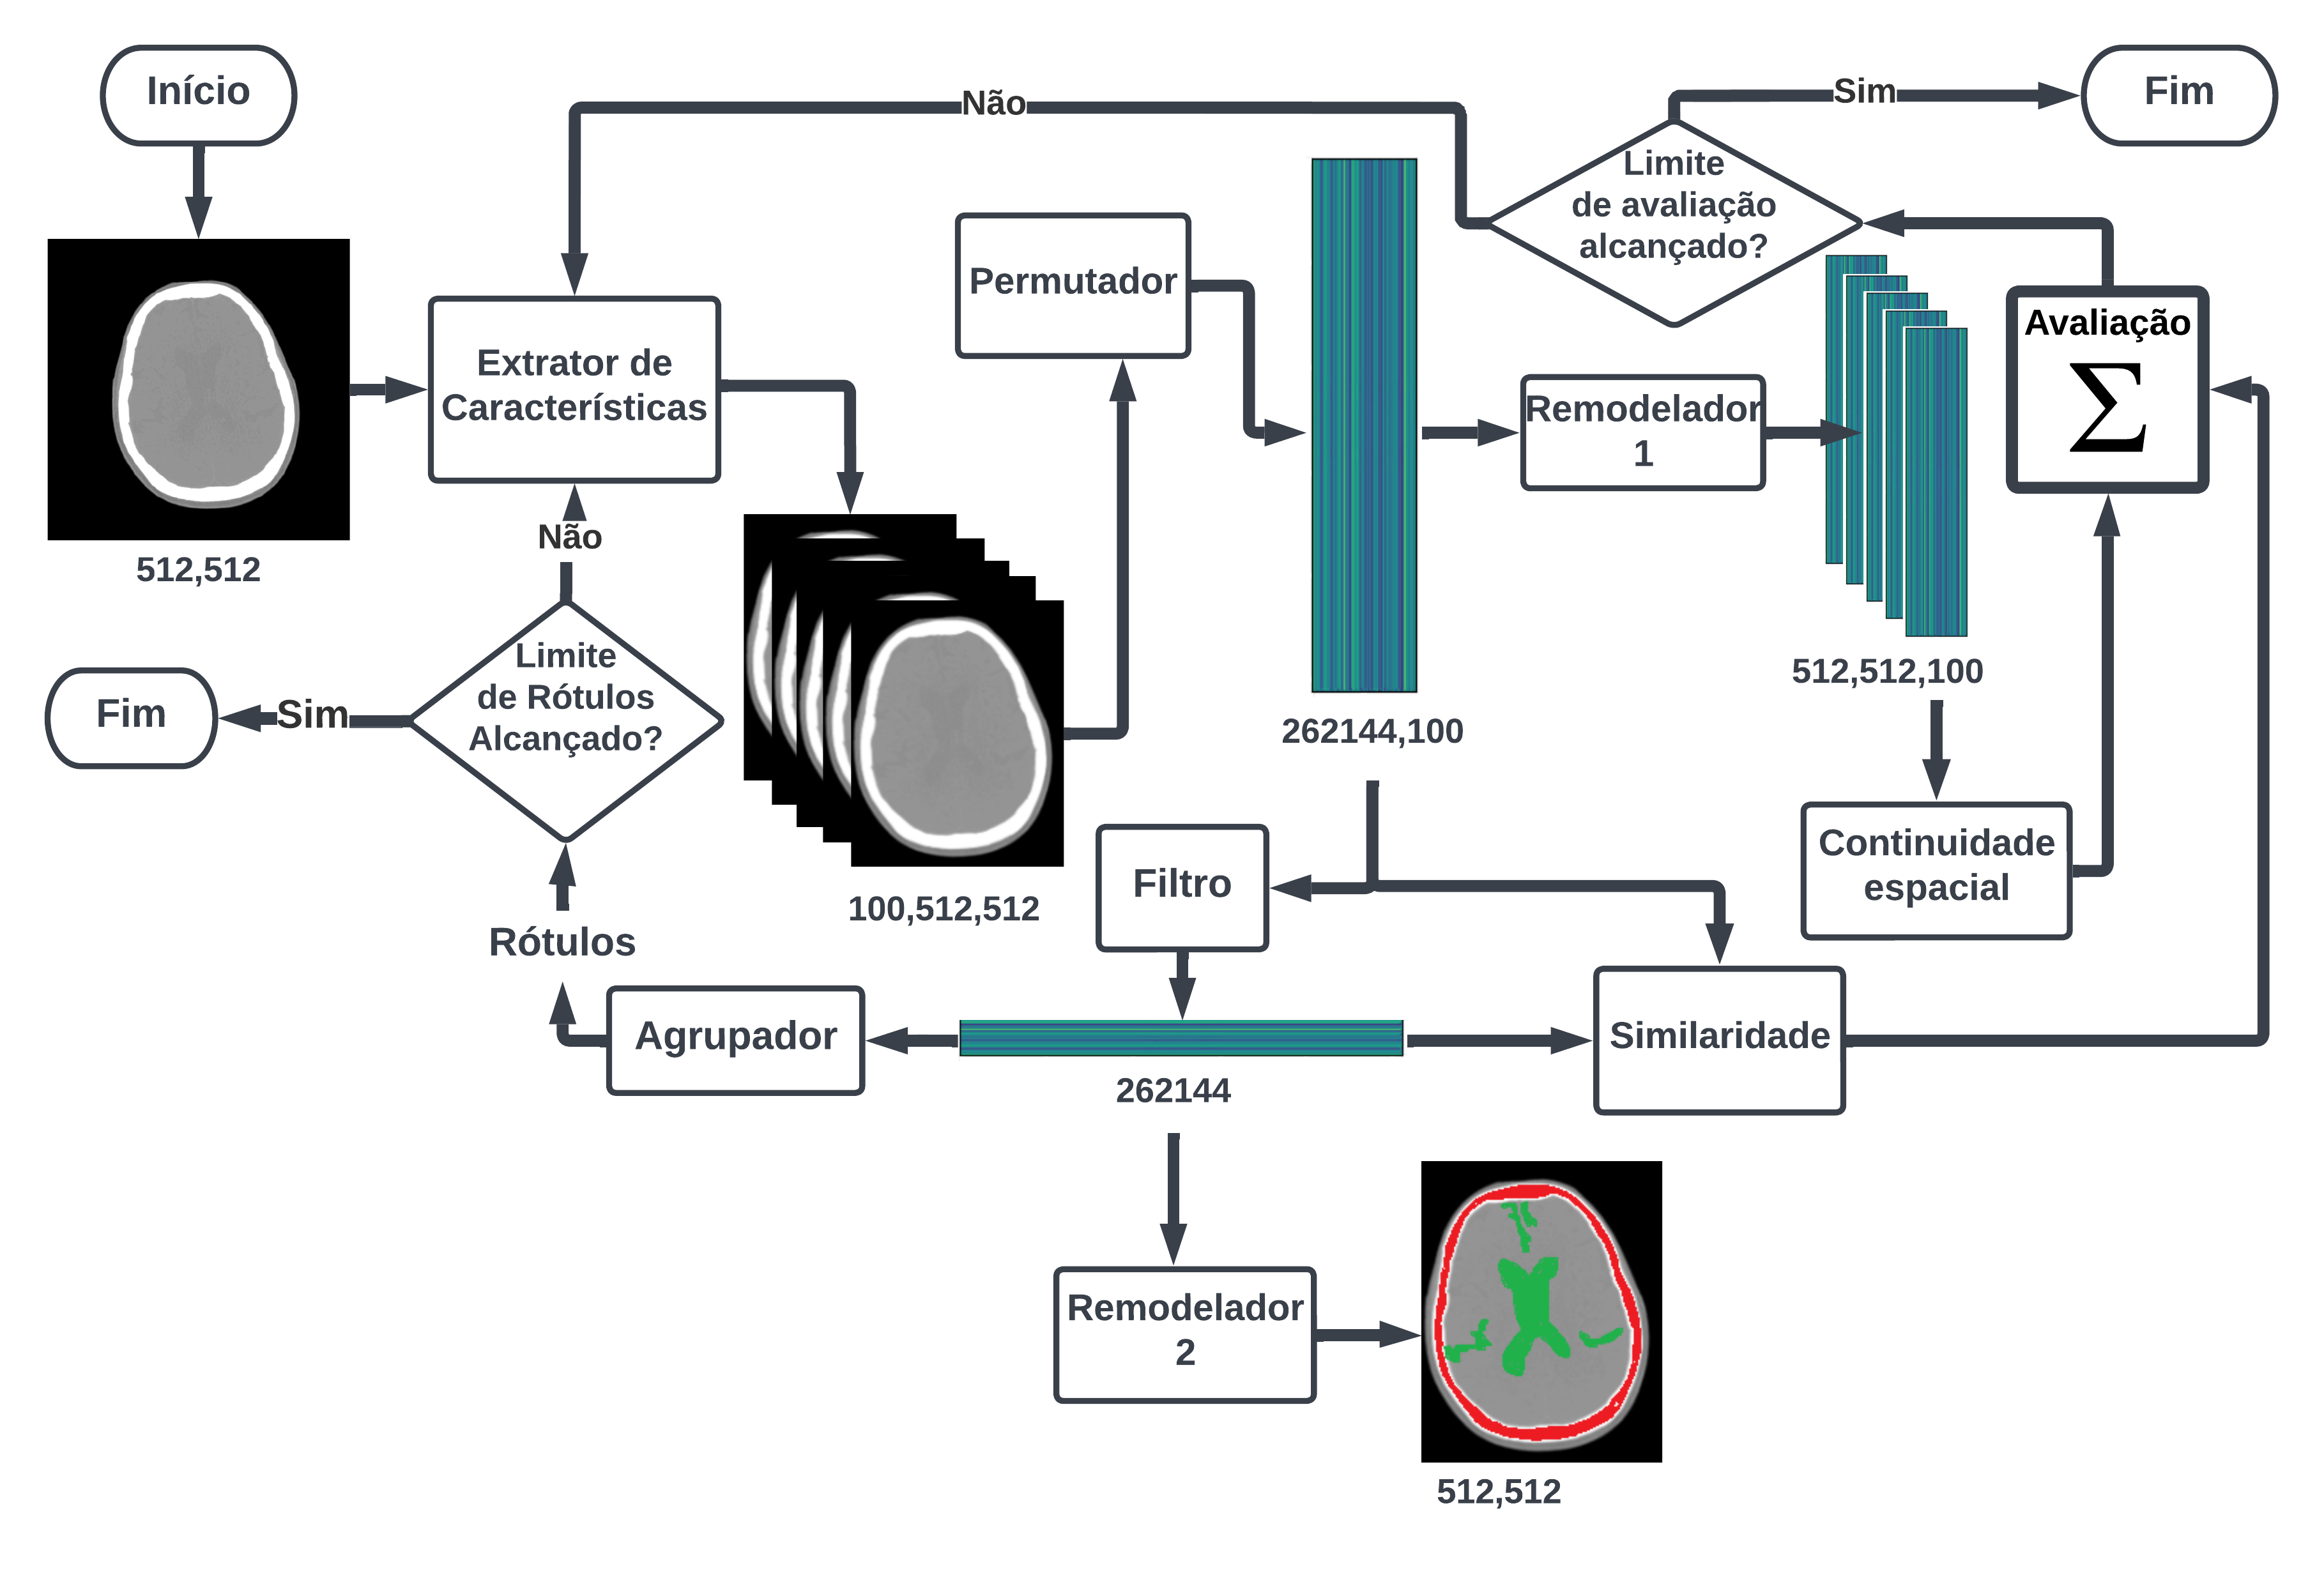

In [11]:
# importações
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [5]:
# Início, carregar qualquer estrutura de dados como exemplo.
# para o exemplo, utilizando o dataset do mnist

datasets.MNIST("~/data", train=True, download=True)
traindt = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

Processing...
Done!


Text(0.5, 1.0, 'Ground Truth: 5')

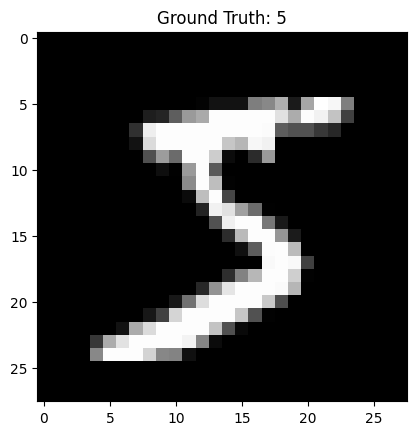

In [43]:
# pegando a primeira imagem do dataset, o numeral 5
examples = enumerate(traindt)
batch_idx, (example_data, example_targets) = next(examples)
numero_cinco = example_data

fig = plt.figure()
plt.imshow(numero_cinco[0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets))

In [54]:
# ajustando a estrutura de dados para passar na rede do pytorch
'''input of size [N,C,H, W]
N==>batch size,
C==> number of channels,
H==> height of input planes in pixels,
W==> width in pixels.
'''
numero_cinco.shape
numero_cinco = numero_cinco.reshape(1,1,28,28)
numero_cinco.shape

torch.Size([1, 1, 28, 28])

In [200]:
# rede neural convolucional com apenas uma camada de convolução, com um filtro e uma camada de redução
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, kernel_size=3)
        self.conv2 = nn.Conv2d(1, 1, kernel_size=3)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        return x

In [201]:
# instanciando a rede para aplicar como filtro
network = Net()
network.train()

Net(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
)

In [202]:
# aplicando a estrutura de dados do número 5 na rede neural convolucional
# (a rede atuará apenas como filtro de processamento de imagens nesse exemplo)
numero_cinco_conv = network(numero_cinco)

In [204]:
# exibindo a estrutura de dados gerada pela saída da rede
# a imagem convolucionada perderá um pixel acima, um abaixo e um em cada lateral, resultando em 26x26 na primeira convolução
# a imagem após a aplicação da redução em 50% terá dimensão de 13x13 na primeira camada de pool

# e a dimensão irá reduzindo a medida que novas camadas de convolução e redução sejam utilizadas

numero_cinco_conv.shape

torch.Size([1, 1, 5, 5])

In [205]:
#exibindo a estrutura de dados

print(numero_cinco_conv[0][0])

tensor([[0.5158, 1.0846, 1.4114, 1.3385, 1.0103],
        [0.5011, 1.1027, 1.4877, 1.3366, 0.9577],
        [0.4988, 0.5185, 1.2291, 1.1699, 0.6542],
        [0.4983, 0.4986, 0.9029, 1.4870, 1.3138],
        [0.9366, 1.2411, 1.1995, 1.2392, 1.1829]], grad_fn=<SelectBackward>)


In [206]:
#exibindo a estrutura de dados
print(numero_cinco_conv[0][0].detach().numpy())
print(numero_cinco_conv.shape)

[[0.5158027  1.0846057  1.4113861  1.3384904  1.0102733 ]
 [0.50106734 1.102693   1.4877263  1.3366095  0.9576918 ]
 [0.49877527 0.5185416  1.229123   1.1699492  0.6541737 ]
 [0.4983283  0.49860144 0.9028692  1.4870169  1.3138082 ]
 [0.93657994 1.2411457  1.1994635  1.2392274  1.1828976 ]]
torch.Size([1, 1, 5, 5])


Text(0.5, 1.0, 'Ground Truth: 5')

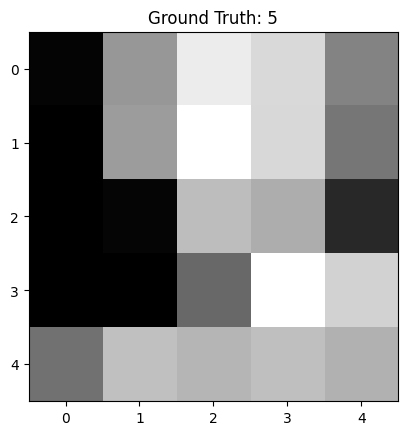

In [207]:
# imprimindo a imagem convolucionada para verificação

fig = plt.figure()
plt.imshow(numero_cinco_conv[0][0].detach().numpy(), cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets))

In [208]:
#definindo as métricas

# O objetivo da entropia cruzada é pegar as probabilidades de saída (P) e medir a distância dos valores reais (R)
# similarity loss definition
loss_fn = torch.nn.CrossEntropyLoss()


# Mede o erro médio absoluto (MAE) entre cada elemento na entrada (X) e no objetivo (Y)
# continuity loss definition
loss_hpy = torch.nn.L1Loss(size_average=True)
loss_hpz = torch.nn.L1Loss(size_average=True)

In [209]:
# imagem em preto e branco terá apenas um canal
canais = 1

# o tamanho da estrutura de dados
tamanho = numero_cinco_conv.shape[2]
print(tamanho)

# gerando o objetivo com zeros iniciais
HPy_target = torch.zeros(tamanho - 1, tamanho, canais)
HPz_target = torch.zeros(tamanho, tamanho - 1, canais)

5


In [210]:
print(HPy_target)
print(HPy_target.shape)

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.]]])
torch.Size([4, 5, 1])


In [211]:
print(HPz_target)
print(HPz_target.shape)

tensor([[[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.]]])
torch.Size([5, 4, 1])


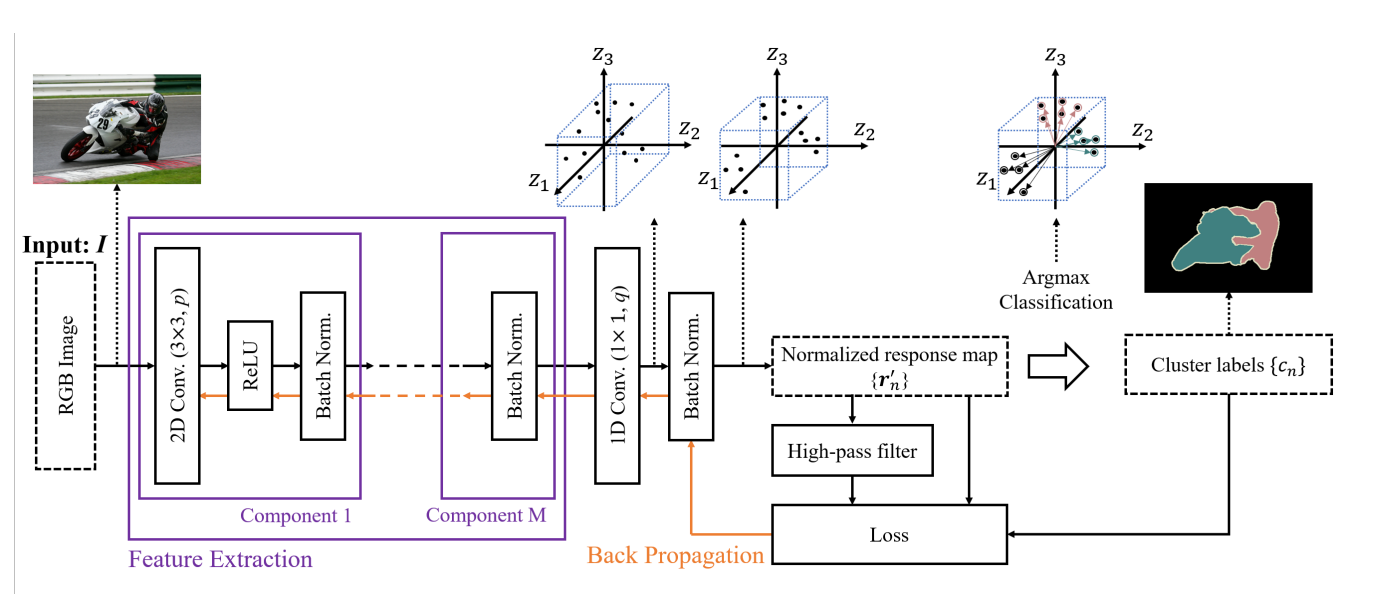

# PERMUTAÇÃO DA SAÍDA DA REDE

In [212]:
output = numero_cinco_conv[0].permute(1, 2, 0).contiguous().view(-1, canais)

In [213]:
print("PERMUTAÇÃO")
print('='*50)
print(output)
print(output.shape)
print('='*50)
print('='*50)
print("NORMAL")
print('='*50)
print(numero_cinco_conv[0][0].detach().numpy())
print(numero_cinco_conv[0][0].shape)

PERMUTAÇÃO
tensor([[0.5158],
        [1.0846],
        [1.4114],
        [1.3385],
        [1.0103],
        [0.5011],
        [1.1027],
        [1.4877],
        [1.3366],
        [0.9577],
        [0.4988],
        [0.5185],
        [1.2291],
        [1.1699],
        [0.6542],
        [0.4983],
        [0.4986],
        [0.9029],
        [1.4870],
        [1.3138],
        [0.9366],
        [1.2411],
        [1.1995],
        [1.2392],
        [1.1829]], grad_fn=<ViewBackward>)
torch.Size([25, 1])
NORMAL
[[0.5158027  1.0846057  1.4113861  1.3384904  1.0102733 ]
 [0.50106734 1.102693   1.4877263  1.3366095  0.9576918 ]
 [0.49877527 0.5185416  1.229123   1.1699492  0.6541737 ]
 [0.4983283  0.49860144 0.9028692  1.4870169  1.3138082 ]
 [0.93657994 1.2411457  1.1994635  1.2392274  1.1828976 ]]
torch.Size([5, 5])


# REMODELADOR

In [214]:
outputHP = output.reshape((numero_cinco_conv.shape[2], numero_cinco_conv.shape[3], canais))
print(outputHP)
print(outputHP.shape)

tensor([[[0.5158],
         [1.0846],
         [1.4114],
         [1.3385],
         [1.0103]],

        [[0.5011],
         [1.1027],
         [1.4877],
         [1.3366],
         [0.9577]],

        [[0.4988],
         [0.5185],
         [1.2291],
         [1.1699],
         [0.6542]],

        [[0.4983],
         [0.4986],
         [0.9029],
         [1.4870],
         [1.3138]],

        [[0.9366],
         [1.2411],
         [1.1995],
         [1.2392],
         [1.1829]]], grad_fn=<ViewBackward>)
torch.Size([5, 5, 1])


Text(0.5, 1.0, 'Ground Truth: 5')

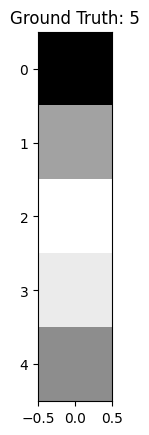

In [215]:
fig = plt.figure()
plt.imshow(outputHP[0].detach().numpy(), cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets))

Text(0.5, 1.0, 'Ground Truth: 5')

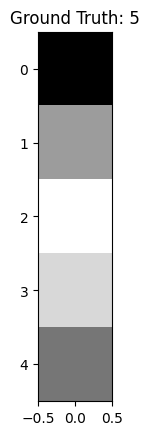

In [216]:
fig = plt.figure()
plt.imshow(outputHP[1].detach().numpy(), cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets))

Text(0.5, 1.0, 'Ground Truth: 5')

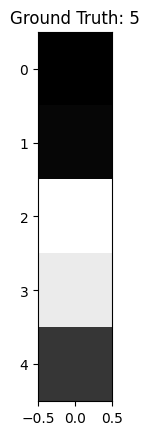

In [217]:
fig = plt.figure()
plt.imshow(outputHP[2].detach().numpy(), cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets))

In [218]:
#subtrai o proprio resultado por ele mesmo deslocado
HPy = outputHP[1:, :, :] - outputHP[0:-1, :, :]
HPz = outputHP[:, 1:, :] - outputHP[:, 0:-1, :]

In [219]:
print(HPy)
HPy.shape

tensor([[[-1.4735e-02],
         [ 1.8087e-02],
         [ 7.6340e-02],
         [-1.8809e-03],
         [-5.2582e-02]],

        [[-2.2921e-03],
         [-5.8415e-01],
         [-2.5860e-01],
         [-1.6666e-01],
         [-3.0352e-01]],

        [[-4.4698e-04],
         [-1.9940e-02],
         [-3.2625e-01],
         [ 3.1707e-01],
         [ 6.5963e-01]],

        [[ 4.3825e-01],
         [ 7.4254e-01],
         [ 2.9659e-01],
         [-2.4779e-01],
         [-1.3091e-01]]], grad_fn=<SubBackward0>)


torch.Size([4, 5, 1])

In [220]:
print(HPz)
HPz.shape

tensor([[[ 5.6880e-01],
         [ 3.2678e-01],
         [-7.2896e-02],
         [-3.2822e-01]],

        [[ 6.0163e-01],
         [ 3.8503e-01],
         [-1.5112e-01],
         [-3.7892e-01]],

        [[ 1.9766e-02],
         [ 7.1058e-01],
         [-5.9174e-02],
         [-5.1578e-01]],

        [[ 2.7314e-04],
         [ 4.0427e-01],
         [ 5.8415e-01],
         [-1.7321e-01]],

        [[ 3.0457e-01],
         [-4.1682e-02],
         [ 3.9764e-02],
         [-5.6330e-02]]], grad_fn=<SubBackward0>)


torch.Size([5, 4, 1])

In [221]:
# continuity loss definition
lhpy = loss_hpy(HPy, HPy_target)
lhpz = loss_hpz(HPz, HPz_target)

In [222]:
lhpy

tensor(0.2329, grad_fn=<L1LossBackward>)

In [223]:
lhpz

tensor(0.2861, grad_fn=<L1LossBackward>)

# Valor máximo

In [224]:
# output é o resultado da permutação
ignore, target = torch.max(output, 1)
im_target = target.data.cpu().numpy()
print(im_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [225]:
# qtd de rótulos encontrados
nLabels = len(np.unique(im_target))

In [226]:
nLabels

1

In [227]:
#soma da função de continuidade com similaridade
d_sim = 1
d_con = 1
loss = d_sim * loss_fn(output, target) + d_con * (lhpy + lhpz)

In [228]:
loss

tensor(0.5191, grad_fn=<AddBackward0>)